In [11]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-aer
!pip install pylatexenc

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke, FakeKyiv
from qiskit_ibm_runtime import SamplerV2 as Sampler
backend = FakeSherbrooke()
from qiskit.quantum_info import SparsePauliOp, Statevector, Operator
from numpy import pi, random
import numpy as np
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit import transpile

Based on section Teleportation: https://learning.quantum.ibm.com/course/basics-of-quantum-information/entanglement-in-action

# $\phi_+$

<IPython.core.display.Latex object>

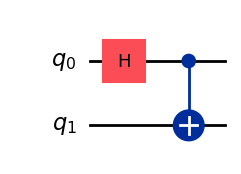

In [12]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

state = Statevector.from_instruction(qc)
display(state.draw('latex'))

display(qc.draw(output='mpl'))

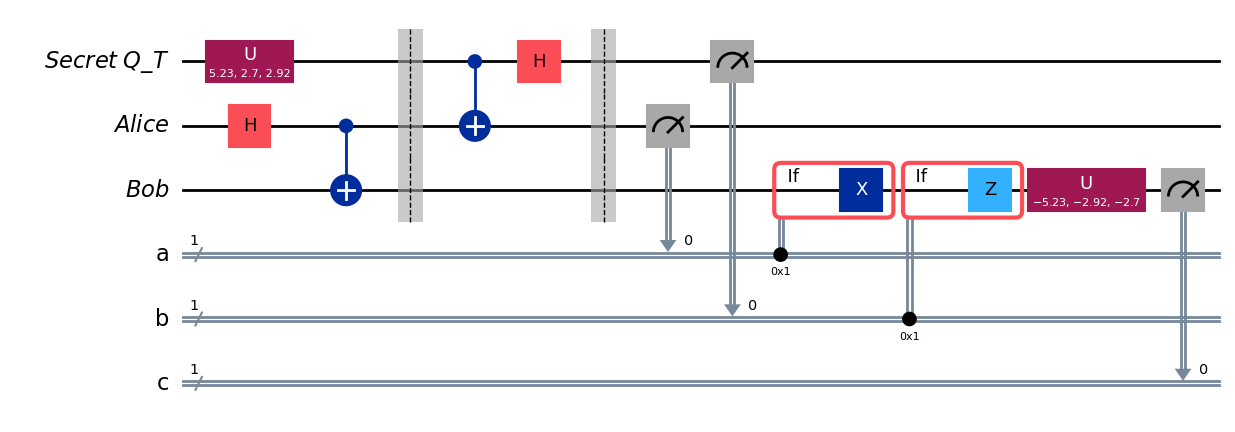

In [27]:
def circuit_for_phi_plus():
  qubit = QuantumRegister(1, "Secret Q_{T}")
  ebit0 = QuantumRegister(1, "Alice")
  ebit1 = QuantumRegister(1, "Bob")
  a = ClassicalRegister(1, "a")
  b = ClassicalRegister(1, "b")
  c = ClassicalRegister(1, "c")

  qc = QuantumCircuit(qubit, ebit0, ebit1, a, b, c)

  U = UGate(random.uniform(0, 2*pi), random.uniform(0, 2*pi), random.uniform(0, 2*pi))
  qc.append(U, qubit)


  # a) Prepare ebit used for teleportation

  qc.h(ebit0)
  qc.cx(ebit0, ebit1)

  # b) Alice's operations

  qc.barrier()

  qc.cx(qubit, ebit0)
  qc.h(qubit)

  qc.barrier()

  # c) Alice measures and sends classical bits to Bob

  qc.measure(ebit0, a)
  qc.measure(qubit, b)

  # d) Bob uses the classical bits to conditionally apply gates

  with qc.if_test((a, 1)):
      qc.x(ebit1)

  with qc.if_test((b, 1)):
      qc.z(ebit1)

  qc.append(U.inverse(), ebit1)

  qc.measure(ebit1, c)

  return qc

qc = circuit_for_phi_plus()
display(qc.draw(output="mpl"))

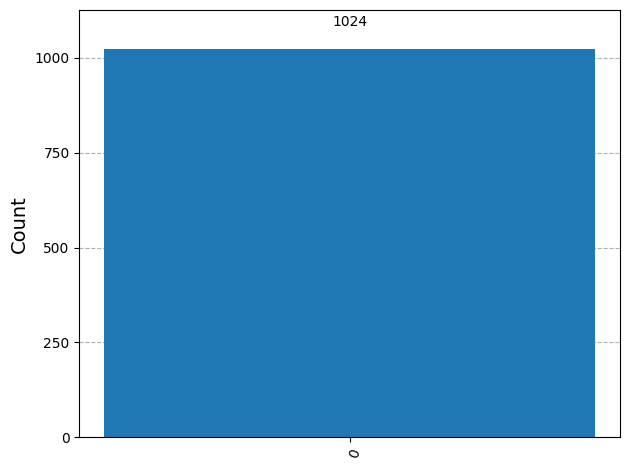

In [28]:
def get_results_ideal(qc):
  result = AerSimulator().run(qc, shots=1024, memory=True).result()
  stat = result.get_counts()

  filtered_statistics = marginal_distribution(stat, [2])
  return filtered_statistics

result = get_results_ideal(qc)
display(plot_histogram(result))

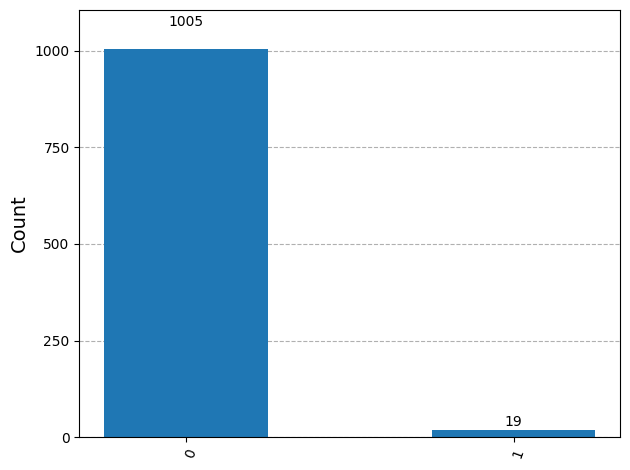

In [29]:
def get_results_real(qc):

  backend = FakeKyiv()
  transpiled_circuit = transpile(qc, backend)

  sampler = Sampler(backend)
  job = sampler.run([transpiled_circuit], shots=1024)
  counts = job.result()[0].data.c.get_counts()
  return counts

counts = get_results_real(qc)
display(plot_histogram(counts))

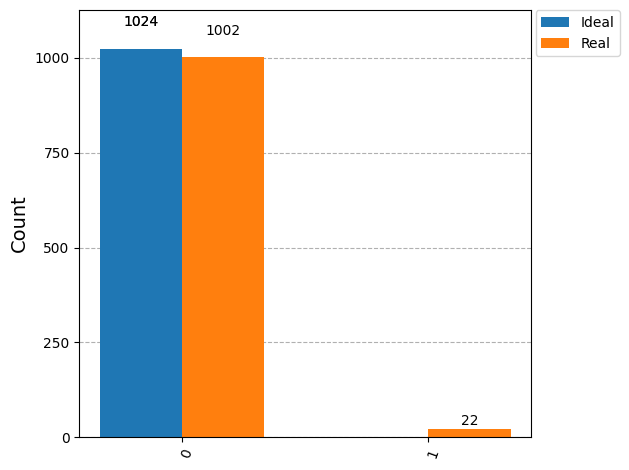

In [39]:
qc = circuit_for_phi_plus()
result_ideal = get_results_ideal(qc)
result_real = get_results_real(qc)
display(plot_histogram([result_ideal, result_real], legend=["Ideal", "Real"]))

# $\phi_-$

<IPython.core.display.Latex object>

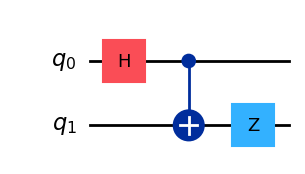

In [13]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)
qc.z(1)

state = Statevector.from_instruction(qc)
display(state.draw('latex'))

display(qc.draw(output='mpl'))

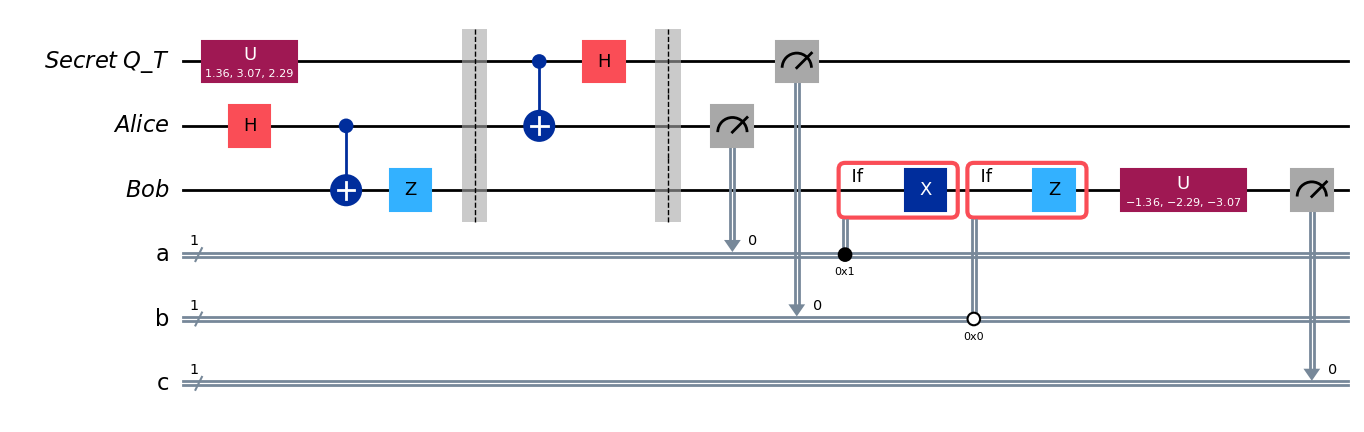

In [57]:
def circuit_for_phi_minus():
  qubit = QuantumRegister(1, "Secret Q_{T}")
  ebit0 = QuantumRegister(1, "Alice")
  ebit1 = QuantumRegister(1, "Bob")
  a = ClassicalRegister(1, "a")
  b = ClassicalRegister(1, "b")
  c = ClassicalRegister(1, "c")

  qc = QuantumCircuit(qubit, ebit0, ebit1, a, b, c)

  U = UGate(random.uniform(0, 2*pi), random.uniform(0, 2*pi), random.uniform(0, 2*pi))
  qc.append(U, qubit)


  # a) Prepare ebit used for teleportation

  qc.h(ebit0)
  qc.cx(ebit0, ebit1)
  qc.z(ebit1)

  # b) Alice's operations

  qc.barrier()

  qc.cx(qubit, ebit0)
  qc.h(qubit)

  qc.barrier()

  # c) Alice measures and sends classical bits to Bob

  qc.measure(ebit0, a)
  qc.measure(qubit, b)

  # d) Bob uses the classical bits to conditionally apply gates

  # X gate states the same compared to phi_plus
  with qc.if_test((a, 1)):
      qc.x(ebit1)

  # Z gate - 0 and 1 change places compared to phi_plus
  with qc.if_test((b, 0)):
      qc.z(ebit1)

  qc.append(U.inverse(), ebit1)

  qc.measure(ebit1, c)

  return qc

qc = circuit_for_phi_minus()
display(qc.draw(output="mpl"))

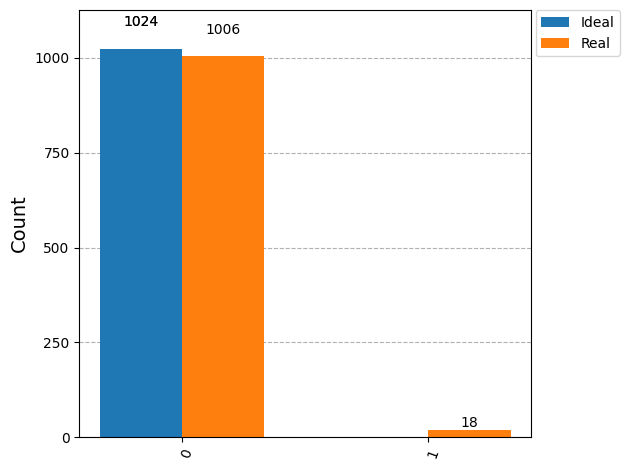

In [65]:
qc = circuit_for_phi_minus()
result_ideal = get_results_ideal(qc)
result_real = get_results_real(qc)
display(plot_histogram([result_ideal, result_real], legend=["Ideal", "Real"]))

# $\psi_+$

<IPython.core.display.Latex object>

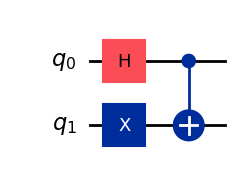

In [17]:
qc = QuantumCircuit(2)

qc.h(0)
qc.x(1)
qc.cx(0, 1)

state = Statevector.from_instruction(qc)
display(state.draw('latex'))

display(qc.draw(output='mpl'))

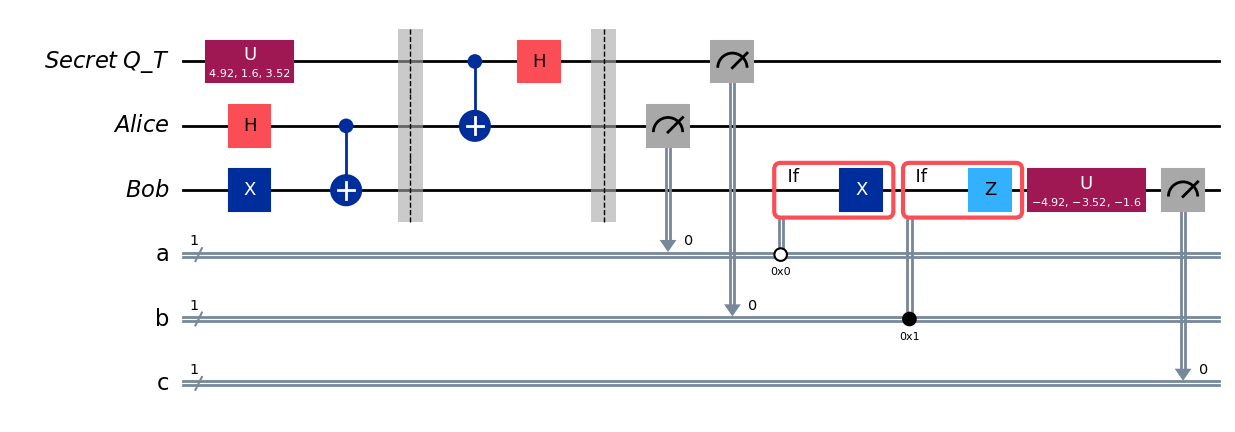

In [70]:
def circuit_for_psi_plus():
  qubit = QuantumRegister(1, "Secret Q_{T}")
  ebit0 = QuantumRegister(1, "Alice")
  ebit1 = QuantumRegister(1, "Bob")
  a = ClassicalRegister(1, "a")
  b = ClassicalRegister(1, "b")
  c = ClassicalRegister(1, "c")

  qc = QuantumCircuit(qubit, ebit0, ebit1, a, b, c)

  U = UGate(random.uniform(0, 2*pi), random.uniform(0, 2*pi), random.uniform(0, 2*pi))
  qc.append(U, qubit)


  # a) Prepare ebit used for teleportation

  qc.h(ebit0)
  qc.x(ebit1)
  qc.cx(ebit0, ebit1)
  # b) Alice's operations

  qc.barrier()

  qc.cx(qubit, ebit0)
  qc.h(qubit)

  qc.barrier()

  # c) Alice measures and sends classical bits to Bob

  qc.measure(ebit0, a)
  qc.measure(qubit, b)

  # d) Bob uses the classical bits to conditionally apply gates

  # X gate applied when 0
  with qc.if_test((a, 0)):
      qc.x(ebit1)

  # Z gate applied when 1
  with qc.if_test((b, 1)):
      qc.z(ebit1)

  qc.append(U.inverse(), ebit1)

  qc.measure(ebit1, c)

  return qc

qc = circuit_for_psi_plus()
display(qc.draw(output="mpl"))

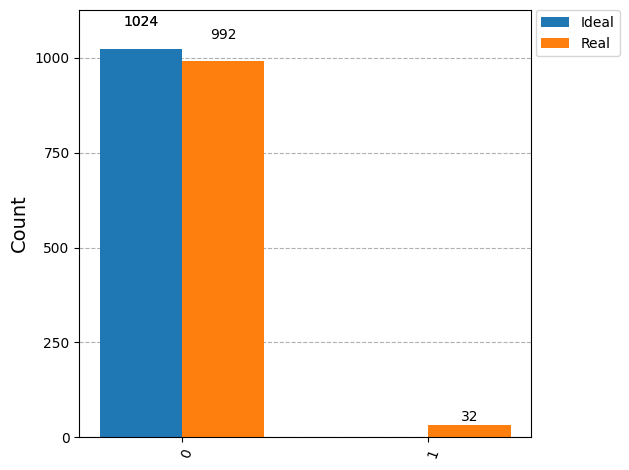

In [72]:
qc = circuit_for_psi_plus()
result_ideal = get_results_ideal(qc)
result_real = get_results_real(qc)
display(plot_histogram([result_ideal, result_real], legend=["Ideal", "Real"]))

# $\psi_-$

<IPython.core.display.Latex object>

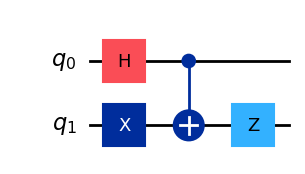

In [18]:
qc = QuantumCircuit(2)

qc.h(0)
qc.x(1)
qc.cx(0, 1)
qc.z(1)

state = Statevector.from_instruction(qc)
display(state.draw('latex'))

display(qc.draw(output='mpl'))

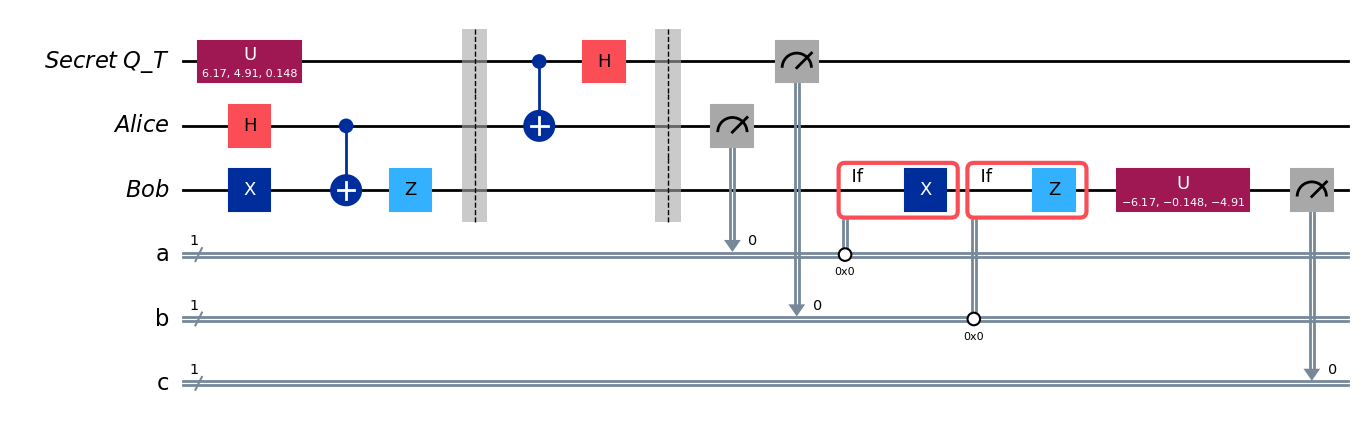

In [76]:
def circuit_for_psi_minus():
  qubit = QuantumRegister(1, "Secret Q_{T}")
  ebit0 = QuantumRegister(1, "Alice")
  ebit1 = QuantumRegister(1, "Bob")
  a = ClassicalRegister(1, "a")
  b = ClassicalRegister(1, "b")
  c = ClassicalRegister(1, "c")

  qc = QuantumCircuit(qubit, ebit0, ebit1, a, b, c)

  U = UGate(random.uniform(0, 2*pi), random.uniform(0, 2*pi), random.uniform(0, 2*pi))
  qc.append(U, qubit)


  # a) Prepare ebit used for teleportation

  qc.h(ebit0)
  qc.x(ebit1)
  qc.cx(ebit0, ebit1)
  qc.z(ebit1)
  # b) Alice's operations

  qc.barrier()

  qc.cx(qubit, ebit0)
  qc.h(qubit)

  qc.barrier()

  # c) Alice measures and sends classical bits to Bob

  qc.measure(ebit0, a)
  qc.measure(qubit, b)

  # d) Bob uses the classical bits to conditionally apply gates

  # X gate applied when 0
  with qc.if_test((a, 0)):
      qc.x(ebit1)

  # Z gate applied when 0
  with qc.if_test((b, 0)):
      qc.z(ebit1)

  qc.append(U.inverse(), ebit1)

  qc.measure(ebit1, c)

  return qc

qc = circuit_for_psi_minus()
display(qc.draw(output="mpl"))

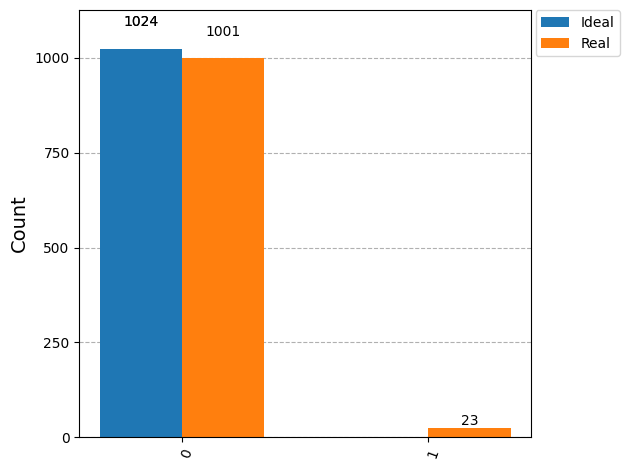

In [77]:
qc = circuit_for_psi_minus()
result_ideal = get_results_ideal(qc)
result_real = get_results_real(qc)
display(plot_histogram([result_ideal, result_real], legend=["Ideal", "Real"]))

# Going from top to bottom I got: 11, 10, 01, 00 where 0 and 1 define when to apply X and Z gate. So for phi_plus apply X when measured 1 and Z when measured 1. For psi_minus apply X and Z when measured 0 on both.